<a href="https://colab.research.google.com/github/Masoud0389/Masoud0389/blob/main/FDI_Detection_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!pwd

In [4]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_FDI2.csv')

In [5]:
X = dataset.iloc[:, :]

In [6]:
#print(X)

# Feature Scaling

In [7]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
# Scaling the data to bring all the attributes to a comparable level
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#maxabs_scaler = MaxAbsScaler()
#X_scaled = maxabs_scaler.fit_transform(X)
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Feature Selection/Reduction

In [8]:
from sklearn.decomposition import PCA
#from sklearn.feature_selection import VarianceThreshold
#Y = VarianceThreshold(threshold=(.0010 * (1 - .0010)))
#X = Y.fit_transform(X)
#print(X)
print(np.shape(X_normalized))
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
#X_principal.columns=['PC1','PC2']
#cdict = {0: 'red', 1: 'blue'}
#X_principal.columns = ['P1', 'P2']


(600019, 34)


In [9]:
#np. set_printoptions(threshold=np. inf)
print(X_principal)
print(type(X_principal))
#print(X_principal.head())
#print(np.shape(X_principal))

               0         1
0      -0.024359  0.960128
1      -0.024359  0.960128
2      -0.024359  0.960128
3      -0.024359  0.960128
4      -0.024359  0.960128
...          ...       ...
600014  0.338766  0.038375
600015  0.338765  0.038377
600016  0.338764  0.038380
600017  0.338764  0.038379
600018  0.338764  0.038379

[600019 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


# Plot Test

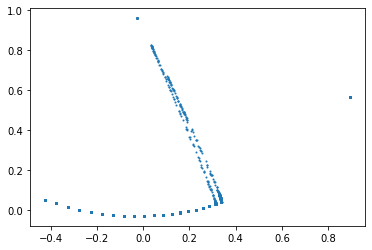

In [10]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], s = 1 , alpha=1)

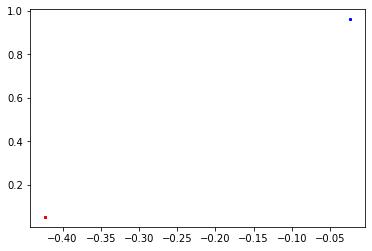

In [11]:
plt.scatter(X_principal.iloc[:8000,0], X_principal.iloc[:8000,1], c = 'b', s = 1 , alpha=1)
plt.scatter(X_principal.iloc[10000:30000,0], X_principal.iloc[10000:30000,1],c = 'b', s = 1 , alpha=1)
plt.scatter(X_principal.iloc[8000:10000,0], X_principal.iloc[8000:10000,1], c = 'r', s = 1 , alpha=1)
plt.show()

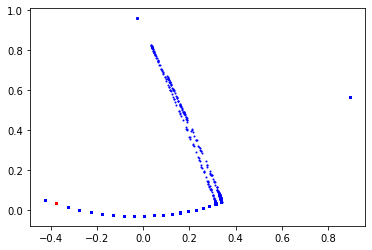

In [12]:

#print(X_principal.iloc[:,0])
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1],c = 'b', s = 1 , alpha=1)
plt.scatter(X_principal.iloc[16000 + 30000:18000+ 30000,0], X_principal.iloc[16000+ 30000:18000+ 30000,1],c = 'r', s = 1 , alpha=1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
plt.show()

# Anomaly Detection

In [13]:
#from sklearn.cluster import DBSCAN
# Numpy array of all the cluster labels assigned to each data point
#db_default = DBSCAN(eps = 0.1, min_samples = 1000000).fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')

In [14]:
#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 10000).fit_predict(X_principal)

In [31]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=500)
label = lof.fit_predict(X_principal)

In [16]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=4, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)

In [17]:
#print(label)
#label = pd.DataFrame(label, columns = ['Column_A'])
#label.to_csv("lof_test1.csv")

# Visualization

No handles with labels found to put in legend.


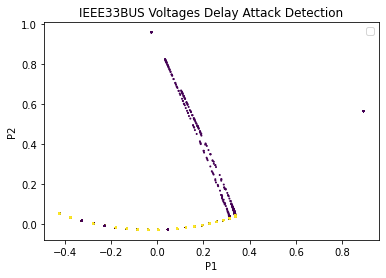

In [32]:
#plt.scatter(X_principal.loc[label == -1, 0], X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(X_principal.loc[label == 1, 0], X_principal.loc[label == 1, 1], s = 1, c = 'blue', label = 'Normal Data')
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = label, s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()

In [19]:
#index = np.where(label == -1)
#index1 = np.where(label==1)
#index = tuple((i+100000)/20000 for i in index)
#index1 = tuple((i+100000)/20000 for i in index1)

In [20]:
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(index1, X_principal.loc[label == 1, 1], s = 1, c = 'blue', label = 'Normal Data')
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
#plt.title('IEEE33BUS Voltages Delay Attack Detection')
#plt.xlabel('Time')
#plt.ylabel('V')
#plt.legend()
#plt.show() 

In [21]:
#ind = pd.Series(range(1,500001))
#ind = (ind/20000)+5
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')

In [22]:
#plt.scatter(ind[200000:260001], X_principal.loc[200000:260000,1], s = 1 )